In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# reading the file
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [6]:
# Training a Linear Regression Model
''' Let's now begin to train out regression model! We will need to first split up our data into an X array that contains 
the features to train on, and a y array with the target variable, in this case the Price column.
We will toss out the Address column because it only has text info that the linear regression model can't use.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [7]:
# creating and training the model
lm = LinearRegression()

In [8]:
lm.fit(X_train,y_train)

LinearRegression()

In [9]:
#Model Evaluation
# Let's evaluate the model by checking out it's coefficients and how we can interpret them.
print(lm.intercept_)

-2640159.7968519107


In [10]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [11]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['coefficient'])
coeff_df

,coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


<!-- Interpreting the coefficients:
Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an *increase of $21.52 *.
Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an *increase of $164883.28 *.
Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an *increase of $122368.67 *.
Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an *increase of $2233.80 *.
Holding all other features fixed, a 1 unit increase in Area Population is associated with an *increase of $15.15 *.
Does this make sense? Probably not because I made up this data. -->

In [12]:
# Let's grab predictions off our test set and see how well it did!
predictions = lm.predict(X_test)

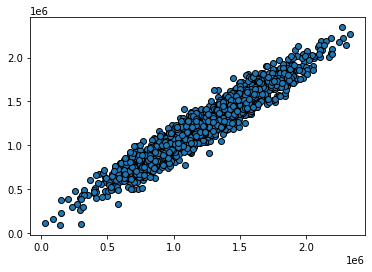

In [13]:
plt.scatter(y_test,predictions,edgecolors='black')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

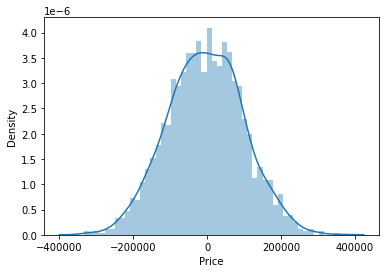

In [14]:
# residual histogram
sns.distplot((y_test-predictions),bins=50)

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914955
MSE: 10460958907.209503
RMSE: 102278.82922291153
